<h1>Φόρτωση βιβλιοθηκών</h1>

In [1]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

from sklearn.model_selection import StratifiedKFold

import keras
from keras.models import Sequential # type: ignore
from keras.layers import Dense, Input # type: ignore
from keras.metrics import MeanSquaredError # type: ignore

import matplotlib.pyplot as plt


2025-06-15 18:35:37.990689: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-06-15 18:35:37.994153: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-06-15 18:35:38.003419: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-06-15 18:35:38.014844: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1750001738.032348 3592048 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1750001738.03

<h1>Προεπεξεργασία Δεδομένων</h1>

In [2]:
# Unused columns
drop_cols = ['PatientID', 'DoctorInCharge']

categorical_cols = ['Gender', 'Ethnicity', 'EducationLevel']

numerical_cols = [
    'Age', 'BMI', 'AlcoholConsumption', 'PhysicalActivity', 'DietQuality', 'SleepQuality', 
    'SystolicBP', 'DiastolicBP', 'CholesterolTotal',
    'CholesterolLDL', 'CholesterolHDL', 'CholesterolTriglycerides',
    'MMSE', 'FunctionalAssessment', 'ADL'
]

# Preprocessing pipelines
standard_scaler = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

# Combine transformers
preprocessor = ColumnTransformer(transformers=[
    ('num', standard_scaler, numerical_cols),
    ('cat', categorical_transformer, categorical_cols),
], remainder='passthrough')  # leaves binary columns as they are

# Load dataset
df = pd.read_csv("alzheimers_disease_data.csv")  # Load your real dataset
df = df.drop(columns=drop_cols)

# Separate input and output
X = df.drop(columns=['Diagnosis'])  # Adjust target if needed
Y = df['Diagnosis']

# Fit-transform your data
X = preprocessor.fit_transform(X)
input_processed = pd.DataFrame(X, columns=preprocessor.get_feature_names_out())

<h1>Παράμετροι Εκπαίδευσης</h1>

In [3]:
I = X.shape[1]  # Number of columns
H = [
    I//2, 
    2*I//3, 
    I,
    2*I
          ]  # Hidden layer neurons

h = [0.001, 0.001, 0.05, 0.1]  # Learning rates
m = [0.2, 0.6, 0.6, 0.6] # Momentum

r = [0.0001, 0.001, 0.01]

# Split the data into a balanced 5-Fold
kfold = StratifiedKFold(n_splits=5, shuffle=True)

hidden_layer_activation = 'relu'  # Activation function for hidden layers
output_activation = 'sigmoid'  # For binary classification

epochs = 100
batch_size = 50

# Early stopping to prevent overfitting
early_stopping = keras.callbacks.EarlyStopping(
    monitor="loss",
    patience=5,
    restore_best_weights=True,
)

<h1>Εκπαίδευση και Προβολή Αποτελεσμάτων</h1>
<h2>Αλλαγή στον αριθμό των νευρώνων</h2>

Number of neurons in the hidden layer:  19


2025-06-15 18:35:40.352123: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Fold 0: Loss=0.5686, MSE=0.1921, Accuracy=0.7000
Fold 1: Loss=0.5451, MSE=0.1824, Accuracy=0.7326
Fold 2: Loss=0.5917, MSE=0.2010, Accuracy=0.7093
Fold 3: Loss=0.5347, MSE=0.1775, Accuracy=0.7512
Fold 4: Loss=0.5514, MSE=0.1855, Accuracy=0.7156
Average Loss: 0.5583
Average MSE: 0.1877
Average Accuracy: 0.7217



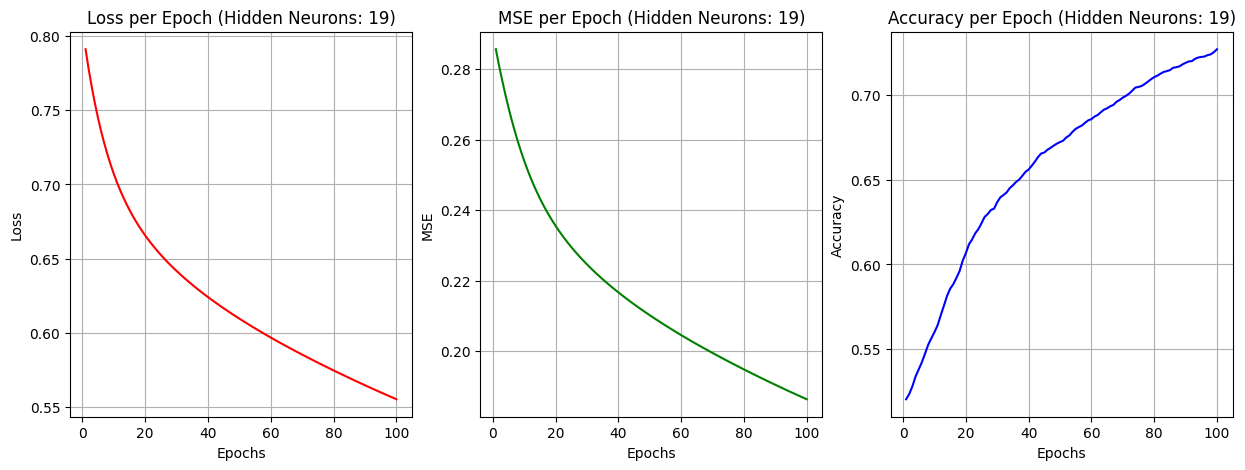

Number of neurons in the hidden layer:  26
Fold 0: Loss=0.5568, MSE=0.1870, Accuracy=0.7233
Fold 1: Loss=0.5665, MSE=0.1907, Accuracy=0.7163
Fold 2: Loss=0.5310, MSE=0.1758, Accuracy=0.7442
Fold 3: Loss=0.5000, MSE=0.1631, Accuracy=0.7698
Fold 4: Loss=0.5292, MSE=0.1754, Accuracy=0.7389
Average Loss: 0.5367
Average MSE: 0.1784
Average Accuracy: 0.7385



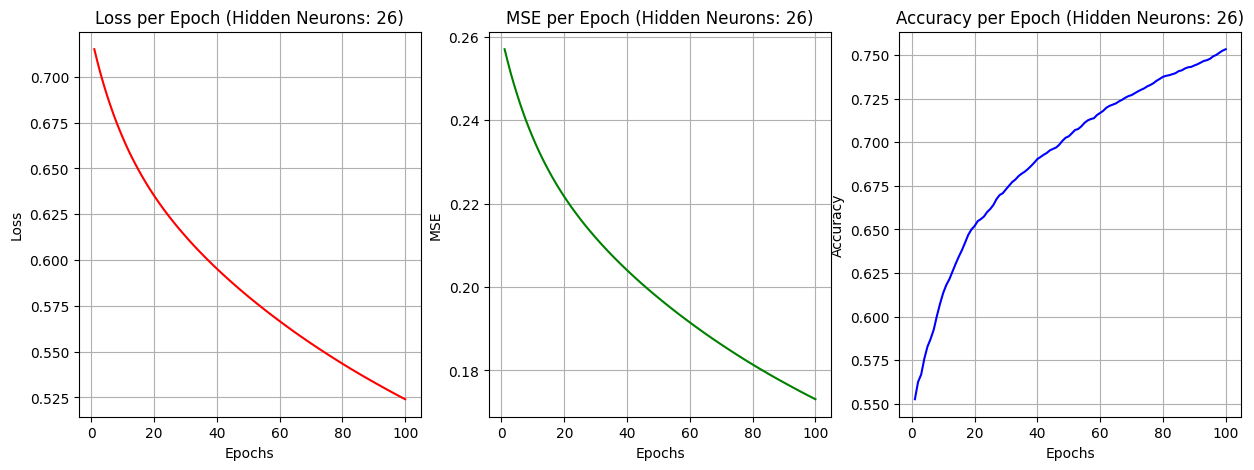

Number of neurons in the hidden layer:  39
Fold 0: Loss=0.5329, MSE=0.1765, Accuracy=0.7372
Fold 1: Loss=0.5298, MSE=0.1754, Accuracy=0.7698
Fold 2: Loss=0.5289, MSE=0.1757, Accuracy=0.7558
Fold 3: Loss=0.5645, MSE=0.1905, Accuracy=0.7349
Fold 4: Loss=0.5342, MSE=0.1769, Accuracy=0.7436
Average Loss: 0.5381
Average MSE: 0.1790
Average Accuracy: 0.7483



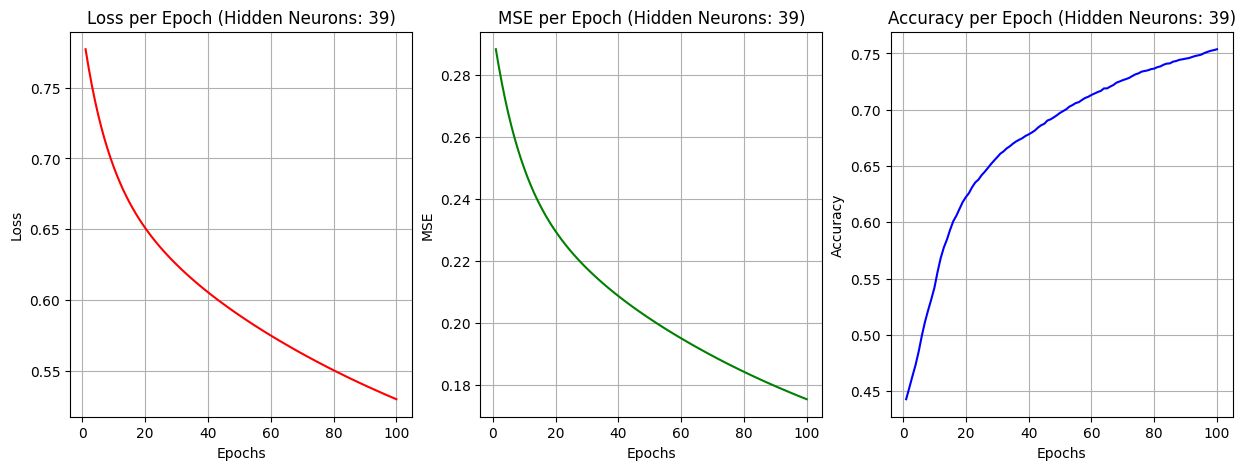

Number of neurons in the hidden layer:  78
Fold 0: Loss=0.5056, MSE=0.1657, Accuracy=0.7767
Fold 1: Loss=0.5070, MSE=0.1631, Accuracy=0.7884
Fold 2: Loss=0.5048, MSE=0.1651, Accuracy=0.7605
Fold 3: Loss=0.5256, MSE=0.1716, Accuracy=0.7791
Fold 4: Loss=0.5175, MSE=0.1702, Accuracy=0.7413
Average Loss: 0.5121
Average MSE: 0.1671
Average Accuracy: 0.7692



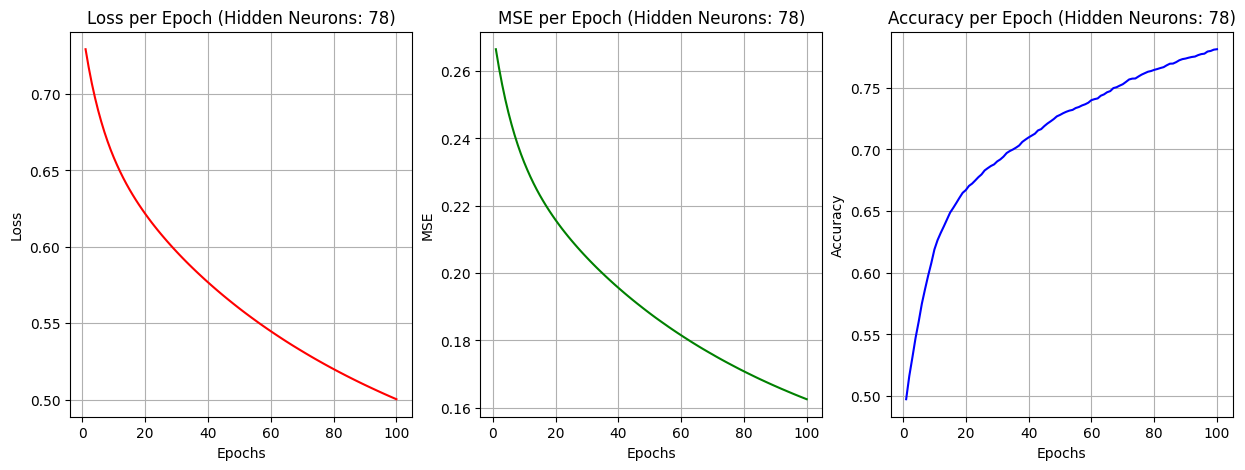

In [4]:
for i in range(len(H)):
    print("Number of neurons in the hidden layer: ", H[i])

    # Αποθήκευση τιμών για το διάγραμμα
    avg_loss_per_epoch = np.zeros(epochs)
    avg_mse_per_epoch = np.zeros(epochs)
    avg_acc_per_epoch = np.zeros(epochs)
    lossList = []
    mseList = []
    accuracyList = []

    for j, (train, test) in enumerate(kfold.split(X, Y)):
        # Δημιουργία μοντέλου
        model = Sequential()
        model.add(Input(shape=(I,)))
        model.add(Dense(H[i], activation=hidden_layer_activation))
        model.add(Dense(1, activation=output_activation))

        # Compile model
        optimizer = keras.optimizers.SGD(learning_rate=h[0], momentum=m[0])
        model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['mse', 'accuracy'])

        # Εκπαίδευση μοντέλου
        history = model.fit(X[train], Y[train], epochs=epochs, batch_size=batch_size, verbose=0, callbacks=[early_stopping])

        # Αποθήκευση των μέσων τιμών για κάθε εποχή
        avg_loss_per_epoch += np.array(history.history['loss']) / kfold.get_n_splits()
        avg_mse_per_epoch += np.array(history.history['mse']) / kfold.get_n_splits()
        avg_acc_per_epoch += np.array(history.history['accuracy']) / kfold.get_n_splits()

        # Αξιολόγηση μοντέλου
        scores = model.evaluate(X[test], Y[test], verbose=0)
        lossList.append(scores[0])
        mseList.append(scores[1])
        accuracyList.append(scores[2])
        print(f"Fold {j}: Loss={scores[0]:.4f}, MSE={scores[1]:.4f}, Accuracy={scores[2]:.4f}")

    print(f"Average Loss: {np.mean(lossList):.4f}")
    print(f"Average MSE: {np.mean(mseList):.4f}")
    print(f"Average Accuracy: {np.mean(accuracyList):.4f}\n")
    
    # Σχεδίαση των γραφημάτων σύγκλισης
    plt.figure(figsize=(15, 5))

    # Loss Plot
    plt.subplot(1, 3, 1)
    plt.plot(range(1, epochs + 1), avg_loss_per_epoch, linestyle='-', color='r')
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.title(f"Loss per Epoch (Hidden Neurons: {H[i]})")
    plt.grid()
    
    # MSE Plot
    plt.subplot(1, 3, 2)
    plt.plot(range(1, epochs + 1), avg_mse_per_epoch, linestyle='-', color='g')
    plt.xlabel("Epochs")
    plt.ylabel("MSE")
    plt.title(f"MSE per Epoch (Hidden Neurons: {H[i]})")
    plt.grid()

    # Accuracy Plot
    plt.subplot(1, 3, 3)
    plt.plot(range(1, epochs + 1), avg_acc_per_epoch, linestyle='-', color='b')
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.title(f"Accuracy per Epoch (Hidden Neurons: {H[i]})")
    plt.grid()

    plt.show()

<h2>Αλλαγή στις παραμέτρους εκμάθησης <b>h</b> και <b>m</b></h2>

Learning Rate: 0.001
Momentum: 0.2
Fold 0: Loss=0.5245, MSE=0.1719, Accuracy=0.7884
Fold 1: Loss=0.5247, MSE=0.1731, Accuracy=0.7628
Fold 2: Loss=0.5108, MSE=0.1687, Accuracy=0.7721
Fold 3: Loss=0.5201, MSE=0.1721, Accuracy=0.7488
Fold 4: Loss=0.5024, MSE=0.1641, Accuracy=0.7646
Average Loss: 0.5165
Average MSE: 0.1700
Average Accuracy: 0.7673


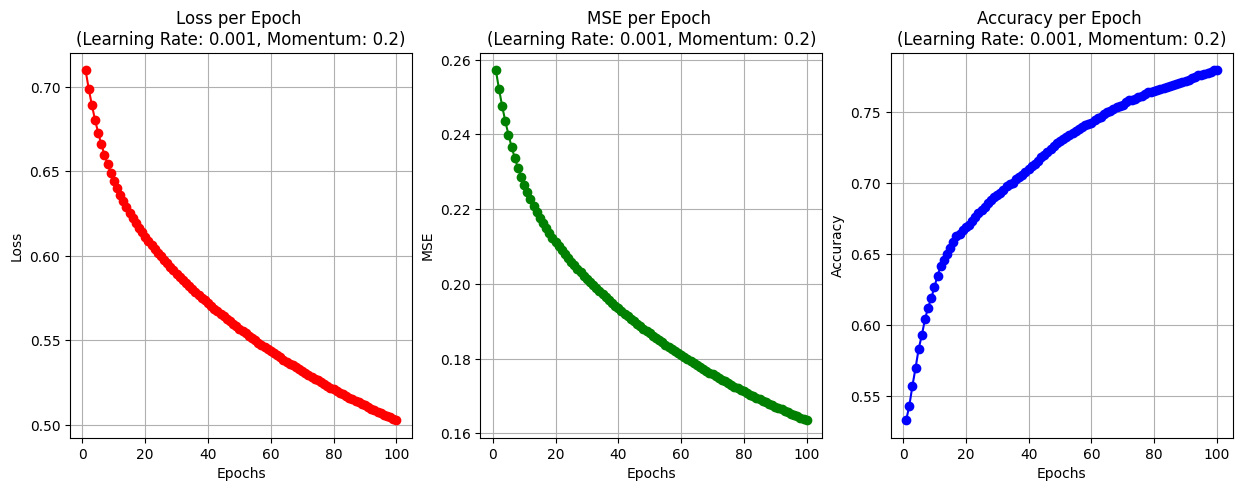

Learning Rate: 0.001
Momentum: 0.6
Fold 0: Loss=0.4465, MSE=0.1408, Accuracy=0.8233
Fold 1: Loss=0.4723, MSE=0.1525, Accuracy=0.7860
Fold 2: Loss=0.4747, MSE=0.1519, Accuracy=0.7953
Fold 3: Loss=0.4474, MSE=0.1427, Accuracy=0.7977
Fold 4: Loss=0.4717, MSE=0.1513, Accuracy=0.7879
Average Loss: 0.4625
Average MSE: 0.1479
Average Accuracy: 0.7980


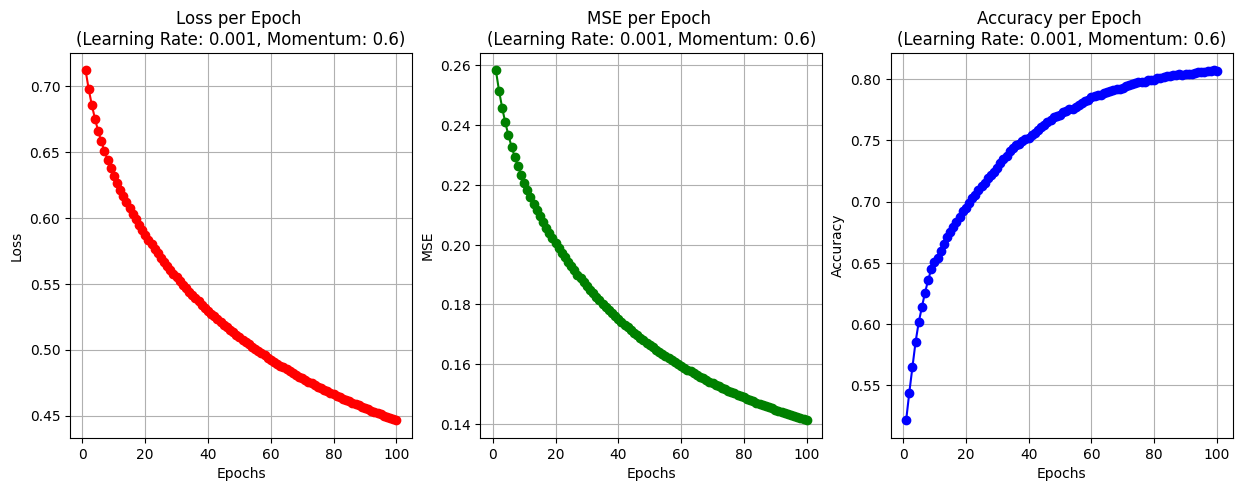

Learning Rate: 0.05
Momentum: 0.6
Fold 0: Loss=0.5390, MSE=0.1363, Accuracy=0.8279
Fold 1: Loss=0.6937, MSE=0.1515, Accuracy=0.8070
Fold 2: Loss=0.5532, MSE=0.1467, Accuracy=0.8070
Fold 3: Loss=0.5963, MSE=0.1420, Accuracy=0.8070
Fold 4: Loss=0.5999, MSE=0.1398, Accuracy=0.8298
Average Loss: 0.5964
Average MSE: 0.1432
Average Accuracy: 0.8157


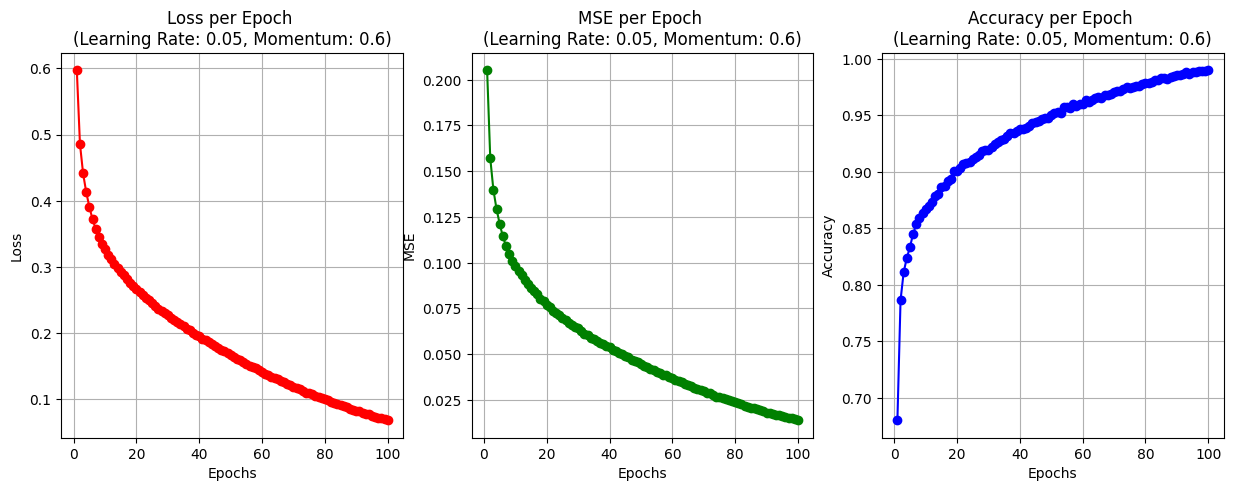

Learning Rate: 0.1
Momentum: 0.6
Fold 0: Loss=0.9256, MSE=0.1478, Accuracy=0.8279
Fold 1: Loss=0.7354, MSE=0.1587, Accuracy=0.8070
Fold 2: Loss=0.7328, MSE=0.1471, Accuracy=0.8163
Fold 3: Loss=0.8105, MSE=0.1601, Accuracy=0.7977
Fold 4: Loss=0.8462, MSE=0.1544, Accuracy=0.8135
Average Loss: 0.8101
Average MSE: 0.1536
Average Accuracy: 0.8125


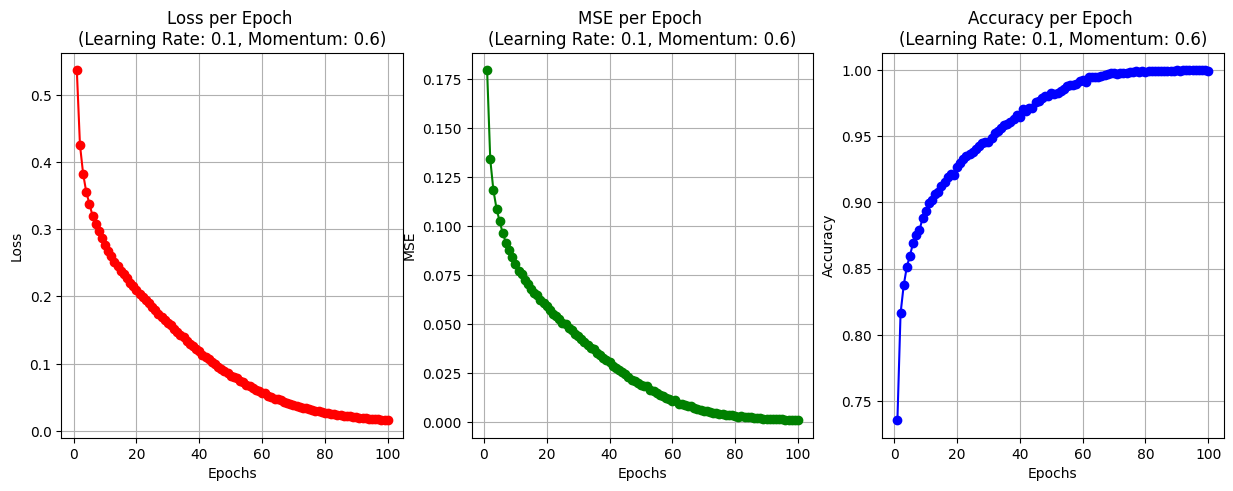

In [5]:
for i in range(len(h)):
    print(f"Learning Rate: {h[i]}")
    print(f"Momentum: {m[i]}")

    # Αποθήκευση τιμών για το διάγραμμα
    avg_loss_per_epoch = np.zeros(epochs)
    avg_mse_per_epoch = np.zeros(epochs)
    avg_acc_per_epoch = np.zeros(epochs)
    lossList = []
    mseList = []
    accuracyList = []

    for j, (train, test) in enumerate(kfold.split(X, Y)):
        # Δημιουργία μοντέλου
        model = Sequential()
        model.add(Input(shape=(I,)))
        model.add(Dense(H[3], activation=hidden_layer_activation))
        model.add(Dense(1, activation=output_activation))

        # Compile model
        optimizer = keras.optimizers.SGD(learning_rate=h[i], momentum=m[i])
        model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['mse', 'accuracy'])

        # Εκπαίδευση μοντέλου και αποθήκευση ιστορικού
        history = model.fit(X[train], Y[train], epochs=epochs, batch_size=batch_size, verbose=0, callbacks=[early_stopping])

        # Αποθήκευση της απώλειας και της ακρίβειας ανά εποχή
        avg_loss_per_epoch += np.array(history.history['loss']) / kfold.get_n_splits()
        avg_mse_per_epoch += np.array(history.history['mse']) / kfold.get_n_splits()
        avg_acc_per_epoch += np.array(history.history['accuracy']) / kfold.get_n_splits()

        # Αξιολόγηση μοντέλου
        scores = model.evaluate(X[test], Y[test], verbose=0)
        lossList.append(scores[0])
        mseList.append(scores[1])
        accuracyList.append(scores[2])
        print(f"Fold {j}: Loss={scores[0]:.4f}, MSE={scores[1]:.4f}, Accuracy={scores[2]:.4f}")

    print(f"Average Loss: {np.mean(lossList):.4f}")
    print(f"Average MSE: {np.mean(mseList):.4f}")
    print(f"Average Accuracy: {np.mean(accuracyList):.4f}")
    
    # Σχεδίαση των γραφημάτων σύγκλισης
    plt.figure(figsize=(15, 5))

    # Loss Plot
    plt.subplot(1, 3, 1)
    plt.plot(range(1, epochs + 1), avg_loss_per_epoch, marker='o', linestyle='-', color='r')
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.title(f"Loss per Epoch \n(Learning Rate: {h[i]}, Momentum: {m[i]})")
    plt.grid()
    
    # MSE Plot
    plt.subplot(1, 3, 2)
    plt.plot(range(1, epochs + 1), avg_mse_per_epoch, marker='o', linestyle='-', color='g')
    plt.xlabel("Epochs")
    plt.ylabel("MSE")
    plt.title(f"MSE per Epoch \n(Learning Rate: {h[i]}, Momentum: {m[i]})")
    plt.grid()

    # Accuracy Plot
    plt.subplot(1, 3, 3)
    plt.plot(range(1, epochs + 1), avg_acc_per_epoch, marker='o', linestyle='-', color='b')
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.title(f"Accuracy per Epoch \n(Learning Rate: {h[i]}, Momentum: {m[i]})")
    plt.grid()

    plt.show()

<h2>Ομαλοποίηση</h2>

r: 0.0001
Fold 0: Loss=0.4827, MSE=0.1546, Accuracy=0.7651
Fold 1: Loss=0.4561, MSE=0.1450, Accuracy=0.8047
Fold 2: Loss=0.4460, MSE=0.1381, Accuracy=0.8186
Fold 3: Loss=0.4709, MSE=0.1495, Accuracy=0.7977
Fold 4: Loss=0.4788, MSE=0.1508, Accuracy=0.7925
Average Loss: 0.4669
Average MSE: 0.1476
Average Accuracy: 0.7957


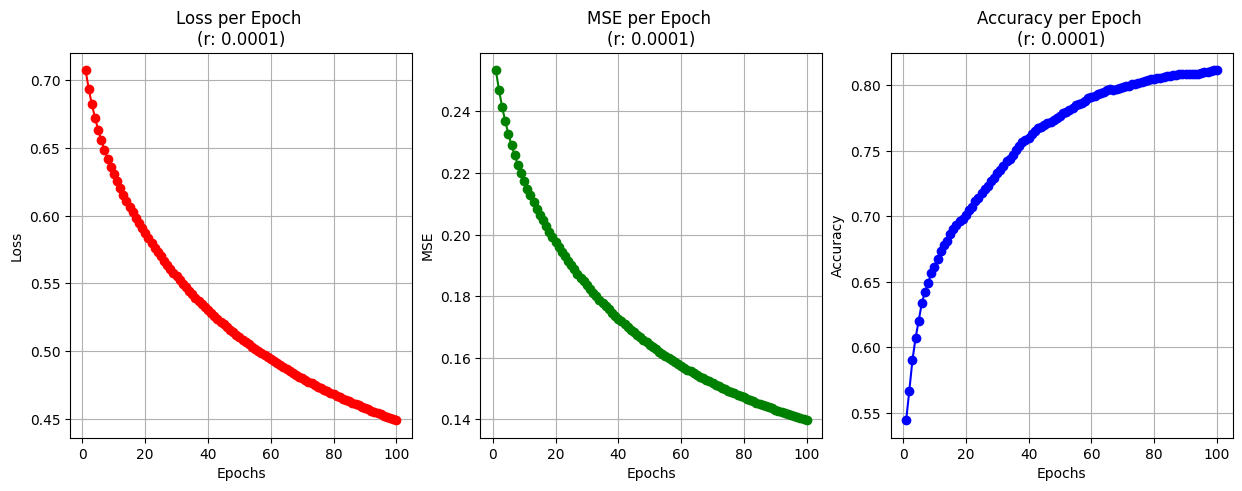

r: 0.001
Fold 0: Loss=0.5047, MSE=0.1434, Accuracy=0.8023
Fold 1: Loss=0.5681, MSE=0.1650, Accuracy=0.7814
Fold 2: Loss=0.5234, MSE=0.1498, Accuracy=0.8047
Fold 3: Loss=0.5032, MSE=0.1418, Accuracy=0.8093
Fold 4: Loss=0.5333, MSE=0.1548, Accuracy=0.7925
Average Loss: 0.5265
Average MSE: 0.1510
Average Accuracy: 0.7980


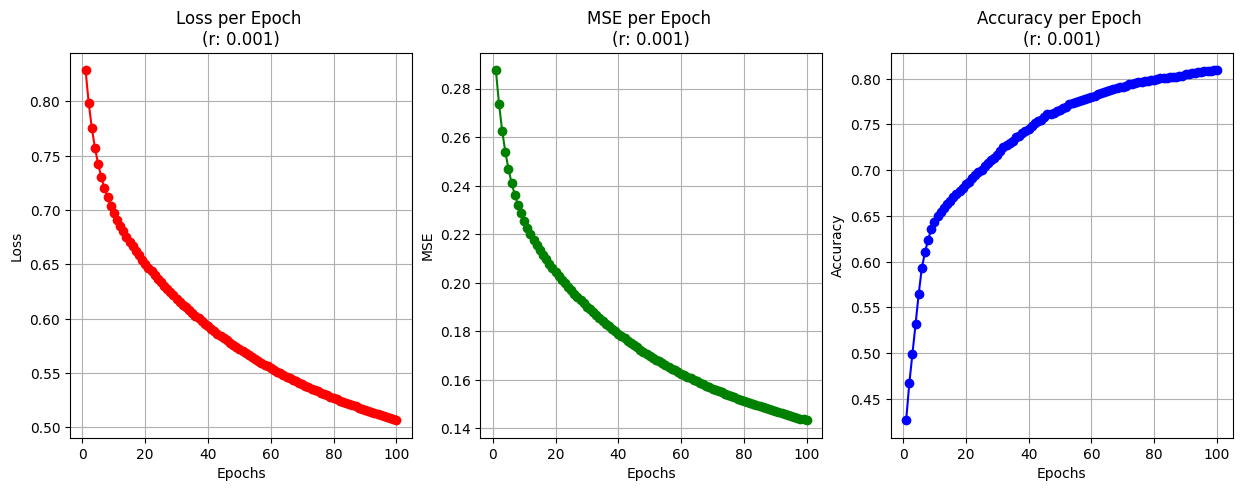

r: 0.01
Fold 0: Loss=0.8667, MSE=0.1465, Accuracy=0.8163
Fold 1: Loss=0.8864, MSE=0.1532, Accuracy=0.7837
Fold 2: Loss=0.8638, MSE=0.1468, Accuracy=0.8023
Fold 3: Loss=0.8822, MSE=0.1549, Accuracy=0.7953
Fold 4: Loss=0.8858, MSE=0.1537, Accuracy=0.7832
Average Loss: 0.8770
Average MSE: 0.1510
Average Accuracy: 0.7962


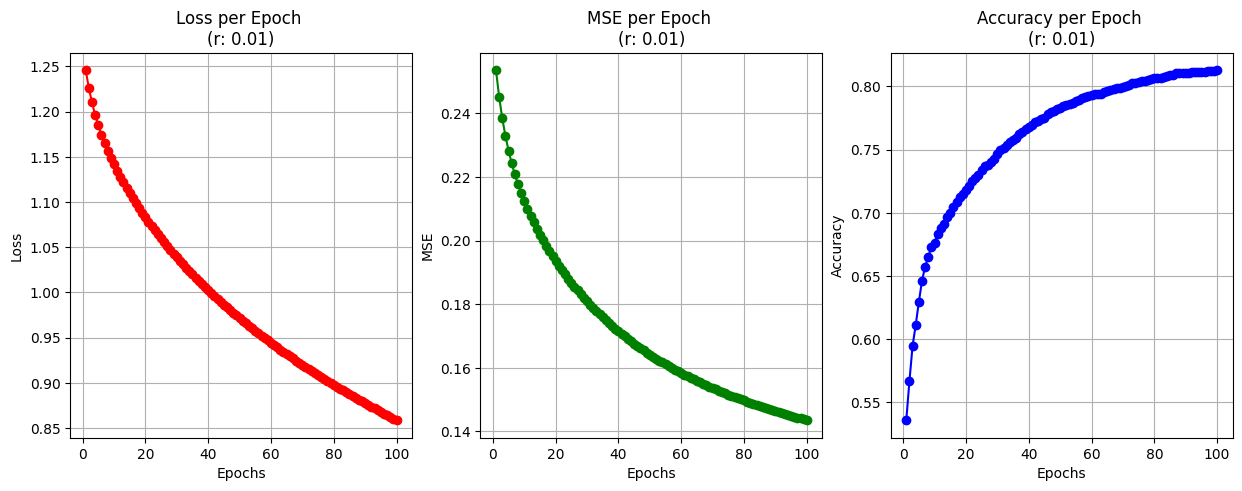

In [6]:
for i in range(len(r)):
    print(f"r: {r[i]}")

    # Αποθήκευση τιμών για το διάγραμμα
    avg_loss_per_epoch = np.zeros(epochs)
    avg_mse_per_epoch = np.zeros(epochs)
    avg_acc_per_epoch = np.zeros(epochs)
    lossList = []
    mseList = []
    accuracyList = []

    for j, (train, test) in enumerate(kfold.split(X, Y)):
        # Δημιουργία μοντέλου
        model = Sequential()
        model.add(Input(shape=(I,)))
        model.add(Dense(H[3], activation=hidden_layer_activation, kernel_regularizer=keras.regularizers.l2(r[i])))
        model.add(Dense(1, activation=output_activation, kernel_regularizer=keras.regularizers.l2(r[i])))

        # Compile model
        optimizer = keras.optimizers.SGD(learning_rate=h[1], momentum=m[1])
        model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['mse', 'accuracy'])

        # Εκπαίδευση μοντέλου και αποθήκευση ιστορικού
        history = model.fit(X[train], Y[train], epochs=epochs, batch_size=batch_size, verbose=0, callbacks=[early_stopping])

        # Αποθήκευση της απώλειας και της ακρίβειας ανά εποχή
        avg_loss_per_epoch += np.array(history.history['loss']) / kfold.get_n_splits()
        avg_mse_per_epoch += np.array(history.history['mse']) / kfold.get_n_splits()
        avg_acc_per_epoch += np.array(history.history['accuracy']) / kfold.get_n_splits()

        # Αξιολόγηση μοντέλου
        scores = model.evaluate(X[test], Y[test], verbose=0)
        lossList.append(scores[0])
        mseList.append(scores[1])
        accuracyList.append(scores[2])
        print(f"Fold {j}: Loss={scores[0]:.4f}, MSE={scores[1]:.4f}, Accuracy={scores[2]:.4f}")

    print(f"Average Loss: {np.mean(lossList):.4f}")
    print(f"Average MSE: {np.mean(mseList):.4f}")
    print(f"Average Accuracy: {np.mean(accuracyList):.4f}")
    
    # Σχεδίαση των γραφημάτων σύγκλισης
    plt.figure(figsize=(15, 5))

    # Loss Plot
    plt.subplot(1, 3, 1)
    plt.plot(range(1, epochs + 1), avg_loss_per_epoch, marker='o', linestyle='-', color='r')
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.title(f"Loss per Epoch \n(r: {r[i]})")
    plt.grid()
    
    # MSE Plot
    plt.subplot(1, 3, 2)
    plt.plot(range(1, epochs + 1), avg_mse_per_epoch, marker='o', linestyle='-', color='g')
    plt.xlabel("Epochs")
    plt.ylabel("MSE")
    plt.title(f"MSE per Epoch \n(r: {r[i]})")
    plt.grid()

    # Accuracy Plot
    plt.subplot(1, 3, 3)
    plt.plot(range(1, epochs + 1), avg_acc_per_epoch, marker='o', linestyle='-', color='b')
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.title(f"Accuracy per Epoch \n(r: {r[i]})")
    plt.grid()

    plt.show()